In [12]:
path_dct = './ThinkStats2/code/2002FemPreg.dct'

In [26]:
with open(path_dct, 'r') as d:
    lines = d.readlines()
    
import re

column_info = []

for line in lines:
    
    match = re.search(r'_column\((\d+)\)', line)
    if match:
        start = int(match.group(1))
        vtype, name, fstring = line.split()[1:4]
        column_info.append([start, vtype, name, fstring])
        
        
    

In [27]:
column_info.sort()

In [29]:
column_info

[[1, 'str12', 'caseid', '%12s'],
 [13, 'byte', 'pregordr', '%2f'],
 [15, 'byte', 'howpreg_n', '%2f'],
 [17, 'byte', 'howpreg_p', '%1f'],
 [18, 'byte', 'moscurrp', '%1f'],
 [19, 'byte', 'nowprgdk', '%1f'],
 [20, 'byte', 'pregend1', '%1f'],
 [21, 'byte', 'pregend2', '%1f'],
 [22, 'byte', 'nbrnaliv', '%1f'],
 [23, 'byte', 'multbrth', '%1f'],
 [24, 'int', 'cmotpreg', '%4f'],
 [28, 'byte', 'prgoutcome', '%1f'],
 [29, 'int', 'cmprgend', '%4f'],
 [33, 'byte', 'flgdkmo1', '%1f'],
 [34, 'int', 'cmprgbeg', '%4f'],
 [38, 'byte', 'ageatend', '%2f'],
 [40, 'byte', 'hpageend', '%2f'],
 [42, 'byte', 'gestasun_m', '%2f'],
 [44, 'byte', 'gestasun_w', '%2f'],
 [46, 'byte', 'wksgest', '%2f'],
 [48, 'byte', 'mosgest', '%2f'],
 [50, 'byte', 'dk1gest', '%1f'],
 [51, 'byte', 'dk2gest', '%1f'],
 [52, 'byte', 'dk3gest', '%1f'],
 [53, 'byte', 'bpa_bdscheck1', '%1f'],
 [54, 'byte', 'bpa_bdscheck2', '%1f'],
 [55, 'byte', 'bpa_bdscheck3', '%1f'],
 [56, 'byte', 'babysex', '%1f'],
 [57, 'byte', 'birthwgt_lb', '%2f']

In [37]:
import pandas as pd
import numpy as np

In [32]:
column_frame = pd.DataFrame(column_info, columns=['start', 'type', 'name', 'fstring'])

In [51]:
column_frame['end'] = column_frame['start'].shift(-1)

In [58]:
column_frame.iloc[-1, -1] = 0

In [61]:
column_frame.end = column_frame.end.astype(int)

In [62]:
column_frame

,start,type,name,fstring,end
0,1,str12,caseid,%12s,13
1,13,byte,pregordr,%2f,15
2,15,byte,howpreg_n,%2f,17
3,17,byte,howpreg_p,%1f,18
4,18,byte,moscurrp,%1f,19
5,19,byte,nowprgdk,%1f,20
6,20,byte,pregend1,%1f,21
7,21,byte,pregend2,%1f,22
8,22,byte,nbrnaliv,%1f,23
9,23,byte,multbrth,%1f,24


In [67]:
colspecs = column_frame[['start', 'end']].values.tolist()

In [69]:
colnames = column_frame['name'].tolist()

In [73]:
path_dat = './ThinkStats2/code/2002FemPreg.dat.gz'

import gzip

with gzip.open(path_dat, 'rt') as f:
    df = pd.read_fwf(f, colspecs=colspecs, names=colnames)

In [74]:
df

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,poverty_i,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw
0,1,1,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,...,0,0,0,3.0,410.389399,869.349602,6448.271112,NaN,91,NaN
1,1,2,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,...,0,0,0,3.0,410.389399,869.349602,6448.271112,NaN,91,NaN
2,2,1,NaN,NaN,NaN,5.0,NaN,3.0,5.0,NaN,...,0,0,0,NaN,7226.301740,8567.549110,2999.542264,1.0,21,NaN
3,2,2,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,...,0,0,0,NaN,7226.301740,8567.549110,2999.542264,1.0,21,NaN
4,2,3,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,...,0,0,0,NaN,7226.301740,8567.549110,2999.542264,1.0,21,NaN
5,6,1,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,...,0,0,0,NaN,4870.926435,5325.196999,8874.440799,2.0,31,NaN
6,6,2,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,...,0,0,0,NaN,4870.926435,5325.196999,8874.440799,2.0,31,NaN
7,6,3,NaN,NaN,NaN,6.0,NaN,1.0,NaN,NaN,...,0,0,0,NaN,4870.926435,5325.196999,8874.440799,2.0,31,NaN
8,7,1,NaN,NaN,NaN,5.0,NaN,1.0,NaN,NaN,...,0,0,0,3.0,409.579565,3787.539000,6911.879921,1.0,41,NaN
9,7,2,NaN,NaN,NaN,5.0,NaN,1.0,NaN,NaN,...,0,0,0,3.0,409.579565,3787.539000,6911.879921,1.0,41,NaN


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13593 entries, 0 to 13592
Columns: 243 entries, caseid to cmintvw
dtypes: float64(174), int64(68), object(1)
memory usage: 25.2+ MB


(array([     0.,      0.,      0.,      0.,      0.,  13593.,      0.,
             0.,      0.,      0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

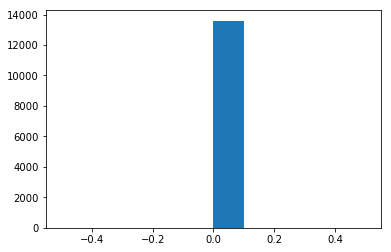

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.hist(df.religion_i)

In [78]:
df.basewgt.max()

99707.832014301617

In [80]:
df.basewgt.mean()

2890.515260626657

In [82]:
df.basewgt.min()

0.0101870950866

In [83]:
df.basewgt.std()

3641.1176225977765